Predict the rent of the house from a given dataset. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear model.
5.Evaluate the models and compare their respective scores like R2, RMSE, etc.

Use : https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


In [3]:
data = pd.read_csv('House_Rent_Dataset.csv')

print(data.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Data Preprocessing

In [6]:
data = data.drop('Posted On', axis=1)

In [7]:
data = data.drop('Point of Contact', axis=1)

In [8]:
print(data.head())
missing_values = data.isnull().sum()

   BHK   Rent  Size            Floor    Area Type             Area Locality  \
0    2  10000  1100  Ground out of 2   Super Area                    Bandel   
1    2  20000   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi   
2    2  17000  1000       1 out of 3   Super Area   Salt Lake City Sector 2   
3    2  10000   800       1 out of 2   Super Area               Dumdum Park   
4    2   7500   850       1 out of 2  Carpet Area             South Dum Dum   

      City Furnishing Status  Tenant Preferred  Bathroom  
0  Kolkata       Unfurnished  Bachelors/Family         2  
1  Kolkata    Semi-Furnished  Bachelors/Family         1  
2  Kolkata    Semi-Furnished  Bachelors/Family         1  
3  Kolkata       Unfurnished  Bachelors/Family         1  
4  Kolkata       Unfurnished         Bachelors         1  


In [9]:
data = data.dropna()

In [11]:
data.head(), missing_values

(   BHK   Rent  Size            Floor    Area Type             Area Locality  \
 0    2  10000  1100  Ground out of 2   Super Area                    Bandel   
 1    2  20000   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi   
 2    2  17000  1000       1 out of 3   Super Area   Salt Lake City Sector 2   
 3    2  10000   800       1 out of 2   Super Area               Dumdum Park   
 4    2   7500   850       1 out of 2  Carpet Area             South Dum Dum   
 
       City Furnishing Status  Tenant Preferred  Bathroom  
 0  Kolkata       Unfurnished  Bachelors/Family         2  
 1  Kolkata    Semi-Furnished  Bachelors/Family         1  
 2  Kolkata    Semi-Furnished  Bachelors/Family         1  
 3  Kolkata       Unfurnished  Bachelors/Family         1  
 4  Kolkata       Unfurnished         Bachelors         1  ,
 BHK                  0
 Rent                 0
 Size                 0
 Floor                0
 Area Type            0
 Area Locality        0
 City        

In [12]:
data.describe().T
data.isna().sum()

,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0


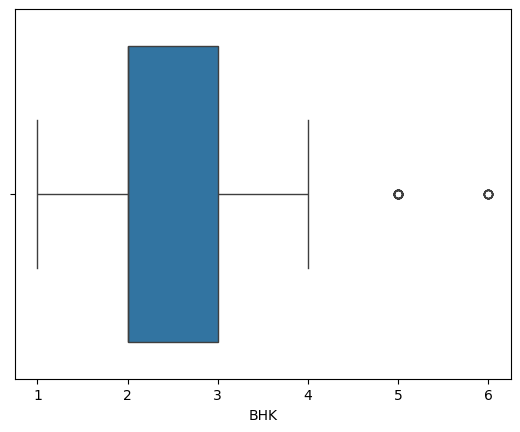

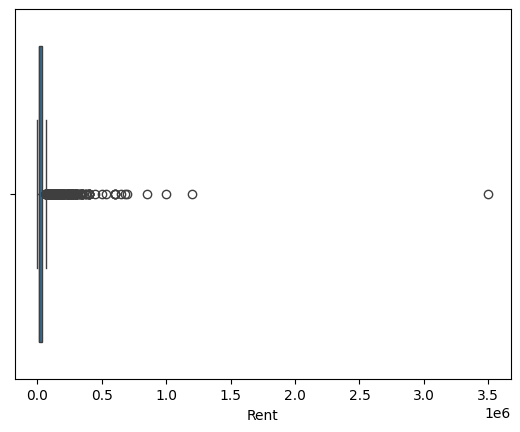

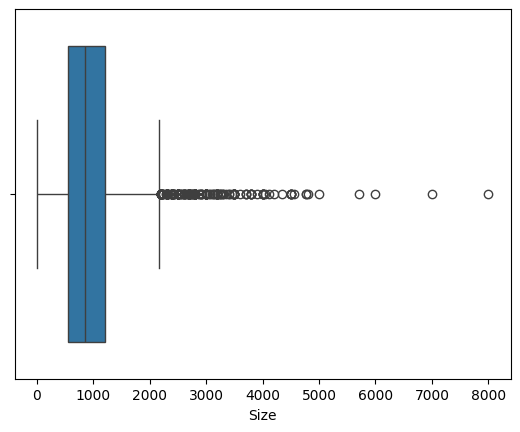

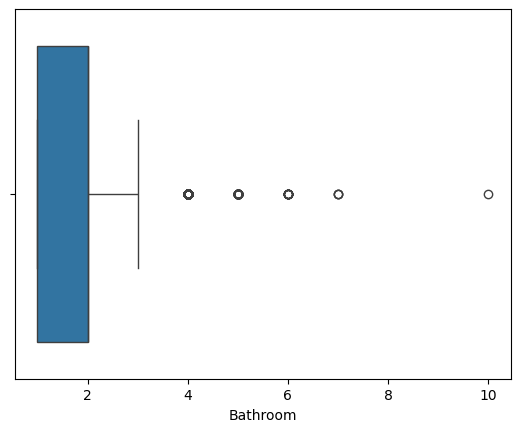

In [13]:
for col in data.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=data,x=col)

In [15]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [19]:
numeric_cols = data.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_cols))

data = data[(z_scores < 3).all(axis=1)]

print(f"Shape of the dataset after removing outliers: {data.shape}")

Shape of the dataset after removing outliers: (4583, 2728)


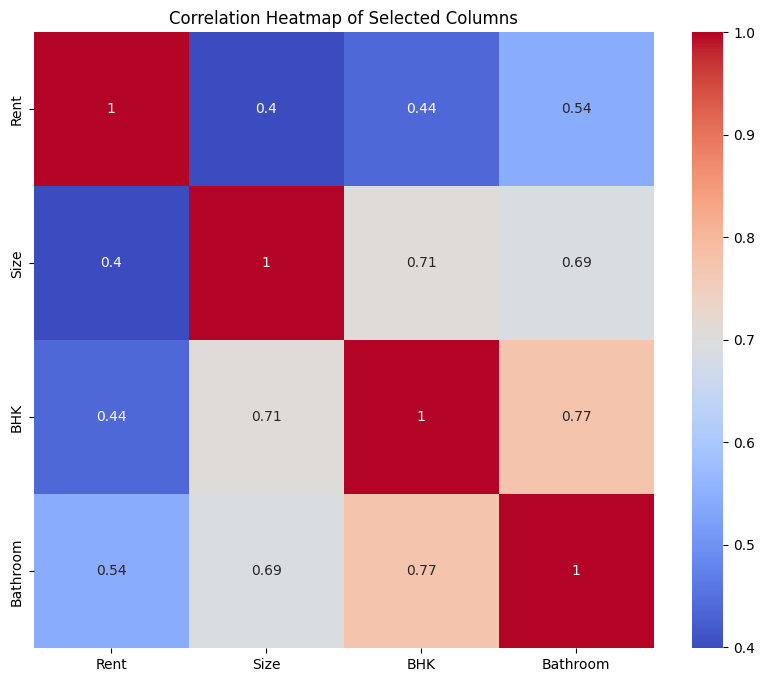

In [20]:
numeric_cols = data.select_dtypes(include=[np.number])
top_cols = numeric_cols.var().sort_values(ascending=False).index[:20000]

plt.figure(figsize=(10, 8))
sns.heatmap(data[top_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [21]:
x = data.drop('Rent', axis=1)
y = data['Rent']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [24]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - R^2: {r2_lr:.4f}")
print(f"Linear Regression - RMSE: {rmse_lr:.4f}")

Linear Regression - R^2: -3254110629934225977226821632.0000
Linear Regression - RMSE: 1931069848068760576.0000


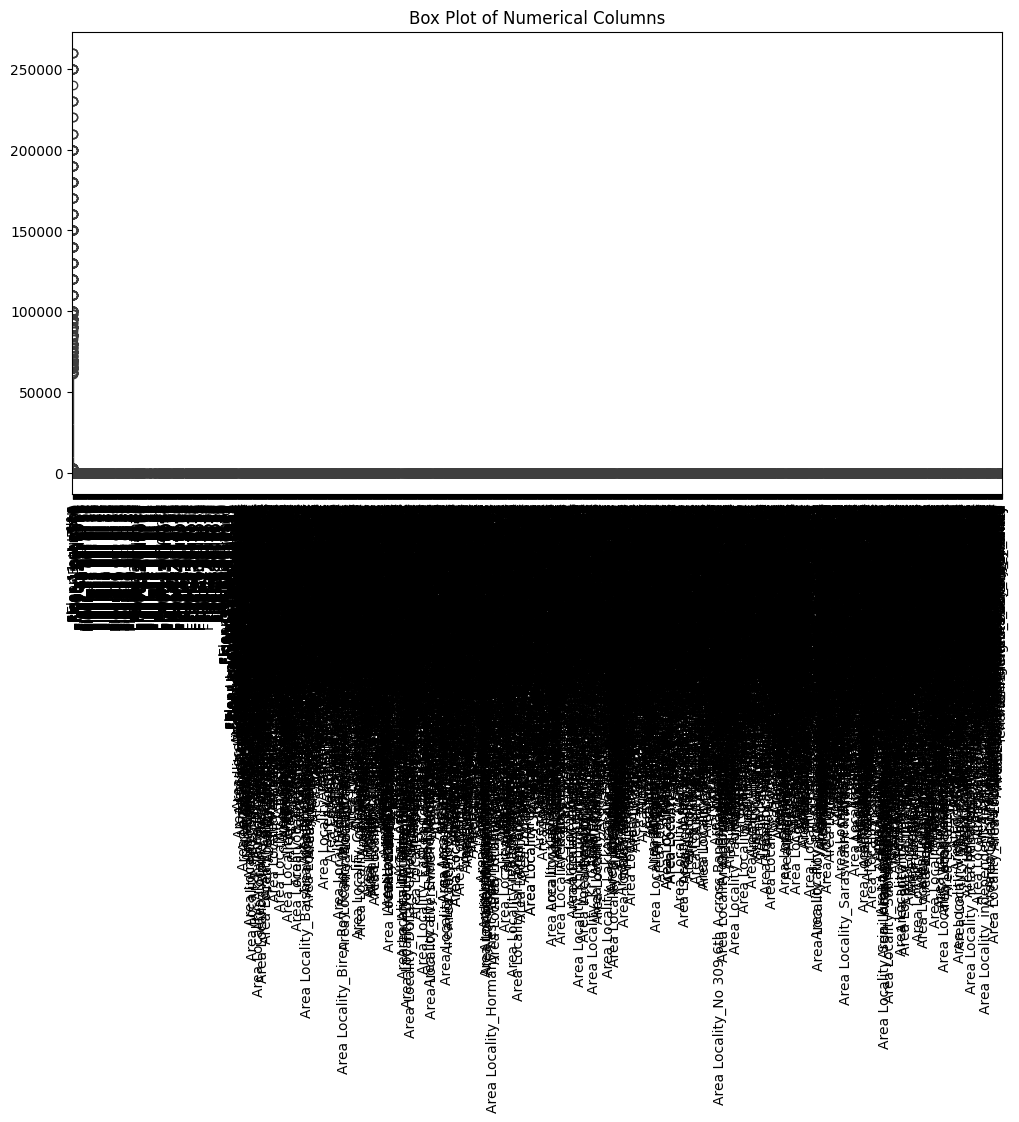

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = data)
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Columns')
plt.show()

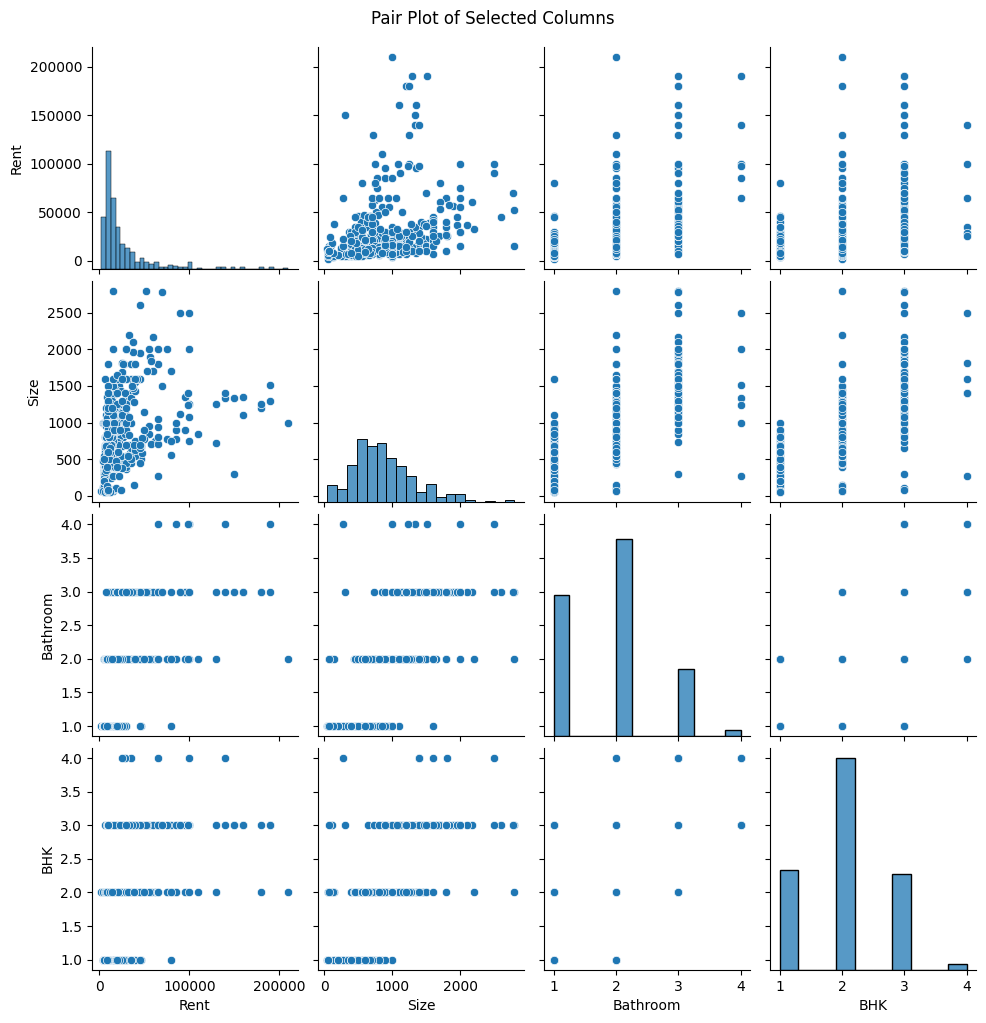

In [27]:
data_sampled = data.sample(frac=0.1, random_state=42)

numeric_cols = data_sampled.select_dtypes(include=[np.number])
top_cols = numeric_cols.var().sort_values(ascending=False).index[:5]

sns.pairplot(data_sampled[top_cols])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()